In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [38]:
df = pd.read_csv("migraine_prediction_dataset (1).csv")
df.head(2)

,Age,Gender,Migraine_Frequency,Warning_Signs_Before,Sleep_Trigger,Duration_of_Migraine,Takes_Medicine,Feels_Dizzy_Before,Caffeine_Helps,Water_Helps
0,57,1,2,1,0,1,0,1,0,0
1,25,0,1,2,1,1,0,0,1,0


In [39]:
df.describe()

,Age,Gender,Migraine_Frequency,Warning_Signs_Before,Sleep_Trigger,Duration_of_Migraine,Takes_Medicine,Feels_Dizzy_Before,Caffeine_Helps,Water_Helps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.761000,0.478000,1.986000,1.495000,0.515000,1.529000,0.501000,0.495000,0.488000,0.494000
std,13.422595,0.499766,1.446339,0.500225,0.500025,1.122684,0.500249,0.500225,0.500106,0.500214
min,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1.000000,4.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1000 non-null   int64
 1   Gender                1000 non-null   int64
 2   Migraine_Frequency    1000 non-null   int64
 3   Warning_Signs_Before  1000 non-null   int64
 4   Sleep_Trigger         1000 non-null   int64
 5   Duration_of_Migraine  1000 non-null   int64
 6   Takes_Medicine        1000 non-null   int64
 7   Feels_Dizzy_Before    1000 non-null   int64
 8   Caffeine_Helps        1000 non-null   int64
 9   Water_Helps           1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [41]:
#0=no migraine
#1=low migraine
#2/3=moderate migraine
#4=high migraine

In [42]:
def f(row):
   
    if row['Migraine_Frequency'] == 3.0 or row['Migraine_Frequency'] == 2.0:
        val = 'moderate migraine'

    elif row['Migraine_Frequency'] == 1.0:
        val = 'low migraine'

    elif row['Migraine_Frequency'] == 4.0:
        val = 'high migraine'

    else:
        val = 'no_migraine'
    return val

df['Migraine_Frequency'] = df.apply(f, axis=1)
df.head()
df['Migraine_Frequency'].value_counts()

Migraine_Frequency
moderate migraine    382
no_migraine          217
high migraine        207
low migraine         194
Name: count, dtype: int64

In [43]:
df.drop('Warning_Signs_Before',axis=1,inplace=True)
df.drop('Duration_of_Migraine',axis=1,inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1000 non-null   int64 
 1   Gender              1000 non-null   int64 
 2   Migraine_Frequency  1000 non-null   object
 3   Sleep_Trigger       1000 non-null   int64 
 4   Takes_Medicine      1000 non-null   int64 
 5   Feels_Dizzy_Before  1000 non-null   int64 
 6   Caffeine_Helps      1000 non-null   int64 
 7   Water_Helps         1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB
None


In [44]:
features=['Age','Gender','Sleep_Trigger','Takes_Medicine','Feels_Dizzy_Before','Caffeine_Helps','Water_Helps']
x=df[features]
y=df[['Migraine_Frequency']]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [45]:
model=LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(x_train,y_train)
print("Model training complete")

Model training complete


d:\TechAxis\week56\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
y_pred=model.predict(x_test)

In [47]:
#Detailed classification report 
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))


Classification Report: 
                   precision    recall  f1-score   support

    high migraine       0.00      0.00      0.00        47
     low migraine       0.17      0.03      0.04        39
moderate migraine       0.33      0.96      0.49        67
      no_migraine       0.00      0.00      0.00        47

         accuracy                           0.33       200
        macro avg       0.12      0.25      0.13       200
     weighted avg       0.14      0.33      0.17       200



d:\TechAxis\week56\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\TechAxis\week56\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\TechAxis\week56\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


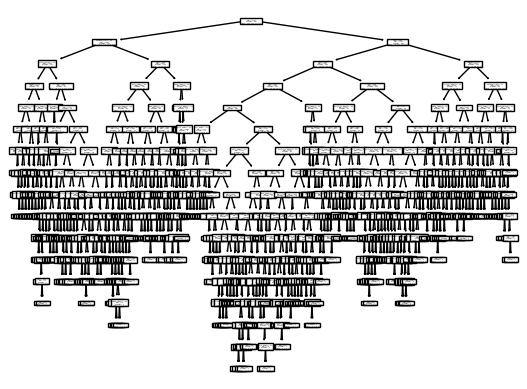

In [48]:
dtree=DecisionTreeClassifier()
dtree=dtree.fit(x_train,y_train)

tree.plot_tree(dtree,feature_names=features)

#Two lines to make our compiler able to draw
plt.savefig('Decisiontrees.png')
plt.show()

In [49]:
y_pred=dtree.predict(x_test)

In [50]:
#Detailed classification report 
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))


Classification Report: 
                   precision    recall  f1-score   support

    high migraine       0.29      0.26      0.27        47
     low migraine       0.23      0.23      0.23        39
moderate migraine       0.36      0.39      0.37        67
      no_migraine       0.28      0.28      0.28        47

         accuracy                           0.30       200
        macro avg       0.29      0.29      0.29       200
     weighted avg       0.30      0.30      0.30       200



In [52]:
#'Age','Gender','Sleep_Trigger','Takes_Medicine','Feels_Dizzy_Before','Caffeine_Helps','Water_Helps'

Outcome=model.predict([[63,1,0,0,0,0,0]])
print(Outcome)

['low migraine']


d:\TechAxis\week56\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.neighbors import KNeighborsClassifier

y_t=list(y_test)
error_rates=[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)

    sum=0
    score=[]
    for j in range(0,len(y_t)):
        if pred[j] == y_t[j]:
            score.append(0)
        else:
            score.append(1)

    for m in score:
        if m == 1:
            sum=sum+m

    error_rates.append(sum/len(score))

d:\TechAxis\week56\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\TechAxis\week56\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\TechAxis\week56\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\TechAxis\week56\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Minimum error:  1.0 at K =  40


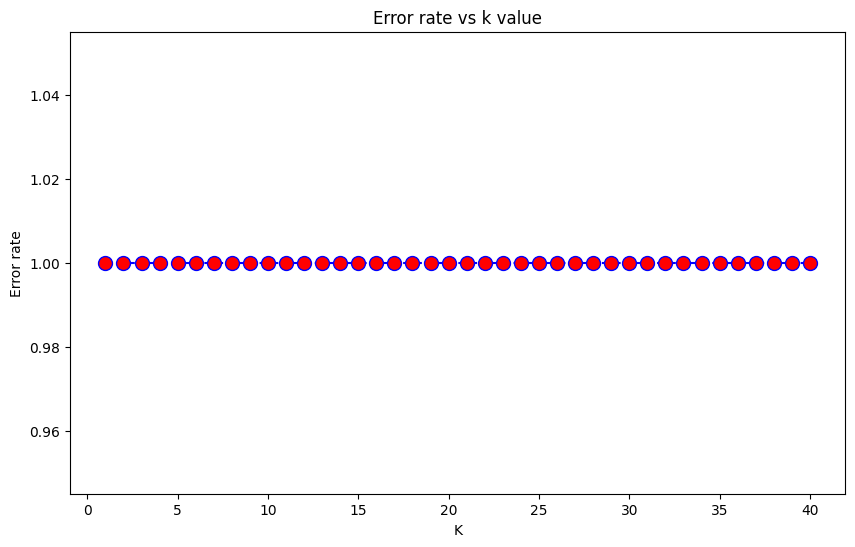

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rates,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs k value")
plt.xlabel("K")
plt.ylabel("Error rate")
rev_error_rates=error_rates[::-1]
req_k_value=len(rev_error_rates)-rev_error_rates.index(min(error_rates))
print("Minimum error: ",min(error_rates),'at K = ',req_k_value)